# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# MEMUAT DATASET
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Submission ML Pemula/dataset_klasifikasi.csv')
print("Dataset shape:", df.shape)
df.head()

Mounted at /content/drive
Dataset shape: (2372, 17)


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionHour,TransactionAmountKategori,AmountToBalanceRatio,AmountPerLogin,TimeOfDay,Cluster
0,15.95,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,16.0,Rendah,0.003120,15.95,2.0,3
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,16.0,Tinggi,0.027345,376.24,2.0,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,18.0,Sedang,0.112523,126.29,2.0,1
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,16.0,Sedang,0.021531,184.50,2.0,0
4,15.95,2023-10-16 17:51:24,Credit,Atlanta,Online,26.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,17.0,Rendah,0.002147,15.95,2.0,0


In [3]:
# Melakukan One-Hot Encoding pada kolom kategorikal
categorical_columns = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'TransactionAmountKategori']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Konversi kolom datetime menjadi fitur numerik
df_encoded["TransactionDate"] = pd.to_datetime(df_encoded["TransactionDate"]).astype(int) / 10**9
df_encoded["PreviousTransactionDate"] = pd.to_datetime(df_encoded["PreviousTransactionDate"]).astype(int) / 10**9

# Memisahkan fitur (X) dan label (y)
X = df_encoded.drop(columns=["Cluster"])
y = df_encoded["Cluster"]

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Membagi data menjadi training dan testing set (80% - 20%) dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Menampilkan ukuran hasil split
print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")

Jumlah data latih: 1897
Jumlah data uji: 475


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
# Melatih model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- **RandomForestClassifier** digunakan sebagai model klasifikasi karena dapat menangani data kompleks dan mengurangi overfitting melalui ensemble learning.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [6]:
# Memprediksi hasil pada data uji
y_pred = model.predict(X_test)

# Mengevaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan hasil evaluasi
print("\nEvaluasi Model Klasifikasi (Sebelum Tuning):")
print("Accuracy:", accuracy)
print("F1 Score:", f1)


Evaluasi Model Klasifikasi (Sebelum Tuning):
Accuracy: 1.0
F1 Score: 1.0


In [7]:
# Menampilkan classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       198
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00       120

    accuracy                           1.00       475
   macro avg       1.00      1.00      1.00       475
weighted avg       1.00      1.00      1.00       475



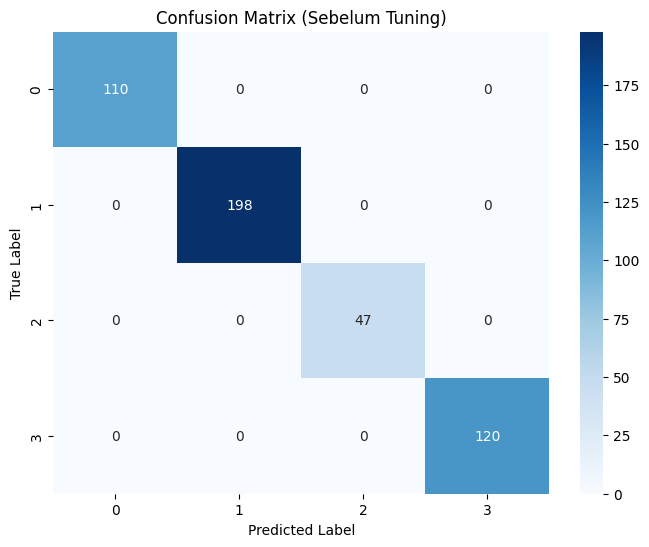

In [8]:
# Menampilkan Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title("Confusion Matrix (Sebelum Tuning)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [9]:
# Hyperparameter tuning untuk Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("\nBest Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 150}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [10]:
# Evaluasi Random Forest setelah tuning
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')


# Menampilkan hasil evaluasi
print("\nEvaluasi Model Klasifikasi (Setelah Tuning):")
print("Accuracy:", accuracy_tuned)
print("F1 Score:", f1_tuned)


Evaluasi Model Klasifikasi (Setelah Tuning):
Accuracy: 1.0
F1 Score: 1.0


In [11]:
# Menampilkan classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       198
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00       120

    accuracy                           1.00       475
   macro avg       1.00      1.00      1.00       475
weighted avg       1.00      1.00      1.00       475



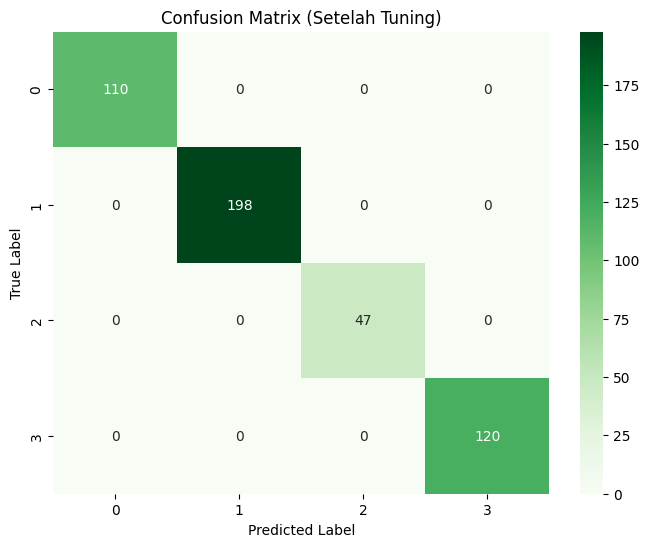

In [12]:
# Menampilkan Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred_tuned),
    annot=True,
    fmt='d',
    cmap='Greens'
)
plt.title("Confusion Matrix (Setelah Tuning)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning.
 -  Akurasi dan F1-score tetap 100%, menunjukkan bahwa tuning tidak memberikan peningkatan signifikan karena model sudah memiliki performa tinggi.
2. Identifikasi kelemahan model, seperti:
  - Tingginya skor pada seluruh kelas menunjukkan model mampu melakukan klasifikasi dengan baik. Akurasi yang tinggi memang bisa memunculkan kekhawatiran overfitting, namun hasil uji yang sebanding dengan hasil pelatihan menunjukkan model bekerja secara seimbang.
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.
  - Mengumpulkan data tambahan untuk mengurangi bias dan meningkatkan generalisasi model.
  - Mencoba algoritma lain seperti XGBoost atau SVM jika hasil masih belum memuaskan.
  - Menggunakan teknik balancing data jika terdapat ketidakseimbangan kelas yang signifikan.
